In [44]:
import sys 
sys.path.append('../src')
from feature_base import load_datasets
import glob
FEATURE_FOLDER = '../features'

feats = glob.glob(FEATURE_FOLDER+'/**.pkl')
data = load_datasets(feats)
data.head()

,moving_average_15,moving_std_15,volume_moving_average_15,RSI_15,moving_average_60,moving_std_60,volume_moving_average_60,RSI_60,close_div_ma_60,high_low_div,open_close_div,open_close_sub,high_low_sub,hlco_ration,ht_trendline,MACD,MACD_signal,MACD_hist,adx,Upper_Shadow,Lower_Shadow,ln_Close,Weight,raw_return_causal,w_raw_return_causal,market_return_causal,raw_market_return_causal,market_return_causal_square,beta_causal,Close_diff1_rank,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,datetime
0,158.306000,NaN,1.282200,NaN,39.576500,NaN,0.320550,NaN,60.0,1.017971,1.000838,1.990,42.3600,0.046978,NaN,NaN,NaN,NaN,NaN,22.920,17.4500,7.772580,2.397895,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218,2018-01-01 00:01:00
1,0.568667,NaN,5.225333,NaN,0.142167,NaN,1.306333,NaN,60.0,1.000000,1.000000,0.000,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.0000,2.143589,4.304065,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399,2018-01-01 00:01:00
2,923.345067,NaN,2.103337,NaN,230.836267,NaN,0.525834,NaN,60.0,1.025442,0.998918,-14.982,347.6900,-0.043090,NaN,NaN,NaN,NaN,NaN,163.624,169.0840,9.536053,6.779922,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643,2018-01-01 00:01:00
3,0.510507,NaN,441.780891,NaN,0.127627,NaN,110.445223,NaN,60.0,1.000379,1.000261,0.002,0.0029,0.689655,NaN,NaN,NaN,NaN,NaN,0.000,0.0009,2.035699,1.386294,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922,2018-01-01 00:01:00
4,1.725133,NaN,8.072487,NaN,0.431283,NaN,2.018122,NaN,60.0,1.001778,1.001662,0.043,0.0460,0.934783,NaN,NaN,NaN,NaN,NaN,0.000,0.0030,3.253355,2.079442,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264,2018-01-01 00:01:00


In [45]:
data = data.replace([np.inf, -np.inf], np.nan)

for f in data.drop(['datetime', 'Target', 'timestamp', 'Asset_ID'], axis=1):
    data[f] = data[f].fillna(data[f].mean())
data = data.dropna(subset=['Target'])


In [29]:
from scipy.stats import spearmanr
import numpy as np

def feature_exposures(df, prediction_name='Target'):
    feature_names = [f for f in df.columns if f != prediction_name]
    exposures = []
    for f in feature_names:
#         fe = spearmanr(df[prediction_name], df[f])[0]
        fe = np.corrcoef(df[prediction_name], df[f])[0, 1]
        exposures.append(fe)
    return np.array(exposures)


def max_feature_exposure(df):
    return np.max(np.abs(feature_exposures(df)))


def feature_exposure(df):
    return np.sqrt(np.mean(np.square(feature_exposures(df))))

In [30]:
fes = feature_exposures(data.drop(['datetime', 'timestamp', 'Asset_ID'], axis=1))
fes

array([-0.00106176, -0.00123817,  0.00757207, -0.00386095, -0.00106259,
       -0.00117148,  0.00637173, -0.00769778, -0.00564876,  0.00018985,
        0.00430976,  0.00103865, -0.0013282 , -0.00297103, -0.00106431,
       -0.000271  ,  0.00015064, -0.0013332 ,  0.00114961, -0.00145166,
       -0.00087794, -0.00134106, -0.0001059 , -0.01977822, -0.01807691,
        0.00776437,  0.00823423,  0.00224173,  0.00622911, -0.02225042,
        0.00570645, -0.0010655 , -0.0010688 , -0.00106518, -0.00106677,
        0.01199198, -0.0010662 ])

In [31]:
np.max(np.abs(fes))

0.022250422117425415

<AxesSubplot:xlabel='features', ylabel='corr_to_oof'>

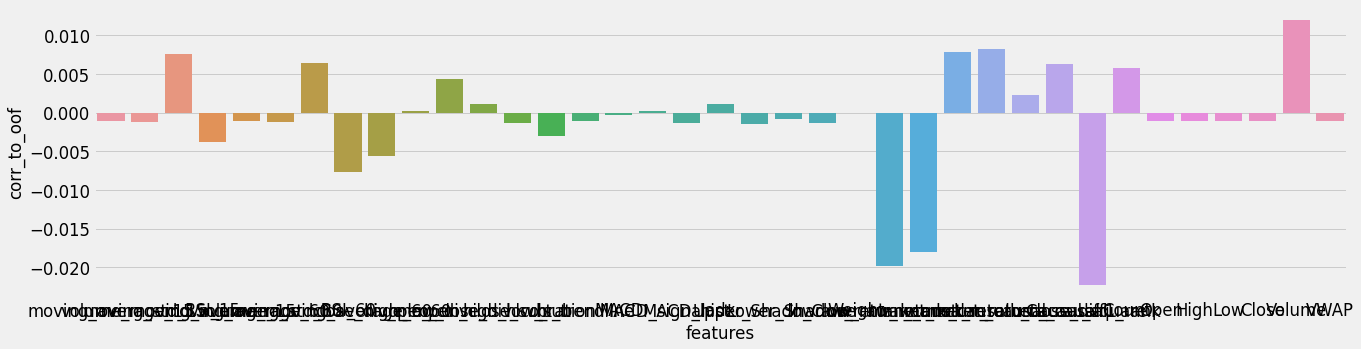

In [32]:
import pandas as pd
# visualize
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from matplotlib import pyplot
from matplotlib.ticker import ScalarFormatter
sns.set_context("talk")
style.use('fivethirtyeight')
pd.options.display.max_columns = None

fes_df = pd.DataFrame()
fes_df['features'] = np.array(data.drop(['datetime', 'timestamp', 'Asset_ID', 'Target'], axis=1).columns)

fes_df['corr_to_oof'] = fes
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
sns.barplot(x='features', y='corr_to_oof', data=fes_df, ax=ax)

In [33]:
fes_df

,features,corr_to_oof
0,moving_average_15,-0.001062
1,moving_std_15,-0.001238
2,volume_moving_average_15,0.007572
3,RSI_15,-0.003861
4,moving_average_60,-0.001063
5,moving_std_60,-0.001171
6,volume_moving_average_60,0.006372
7,RSI_60,-0.007698
8,close_div_ma_60,-0.005649
9,high_low_div,0.000190


In [47]:
import sys
sys.path.append('../src')
from utils import neutralize_series
from tqdm import tqdm
for f in tqdm(fes_df.features):
    # neut
    neut = neutralize_series(data[f], data['Target'], proportion=0.6)
    
    # verify
    original_corr = np.corrcoef(data[f].values, data['Target'].values)[0, 1]
    neut_corr = np.corrcoef(neut, data['Target'].values)[0, 1]
    f_corr = np.corrcoef(data[f].values, neut)[0, 1]
    print('{}: original corr to target={:.3f}, corr to target after neut={:.3f}, corr with old and neut feat={:.3f}'.format(f,
        original_corr, neut_corr, f_corr))
    
    # assign
    data[f] = neut.values

  0%|          | 0/37 [00:00<?, ?it/s]../src/utils.py:375: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  correction = proportion * (exposures.dot(np.linalg.lstsq(exposures, scores)[0]))
  3%|▎         | 1/37 [00:03<02:01,  3.37s/it]

moving_average_15: original corr to target=-0.001, corr to target after neut=-0.000, corr with old and neut feat=1.000


  5%|▌         | 2/37 [00:06<01:57,  3.35s/it]

moving_std_15: original corr to target=-0.001, corr to target after neut=-0.000, corr with old and neut feat=1.000


  8%|▊         | 3/37 [00:10<01:53,  3.35s/it]

volume_moving_average_15: original corr to target=0.008, corr to target after neut=0.003, corr with old and neut feat=1.000


 11%|█         | 4/37 [00:13<01:49,  3.33s/it]

RSI_15: original corr to target=-0.004, corr to target after neut=-0.002, corr with old and neut feat=1.000


 14%|█▎        | 5/37 [00:16<01:46,  3.32s/it]

moving_average_60: original corr to target=-0.001, corr to target after neut=-0.000, corr with old and neut feat=1.000


 16%|█▌        | 6/37 [00:20<01:43,  3.34s/it]

moving_std_60: original corr to target=-0.001, corr to target after neut=-0.000, corr with old and neut feat=1.000


 19%|█▉        | 7/37 [00:23<01:40,  3.36s/it]

volume_moving_average_60: original corr to target=0.006, corr to target after neut=0.003, corr with old and neut feat=1.000


 22%|██▏       | 8/37 [00:26<01:37,  3.35s/it]

RSI_60: original corr to target=-0.008, corr to target after neut=-0.003, corr with old and neut feat=1.000


 24%|██▍       | 9/37 [00:30<01:33,  3.35s/it]

close_div_ma_60: original corr to target=-0.006, corr to target after neut=-0.002, corr with old and neut feat=1.000


 27%|██▋       | 10/37 [00:33<01:30,  3.35s/it]

high_low_div: original corr to target=0.000, corr to target after neut=0.000, corr with old and neut feat=1.000


 30%|██▉       | 11/37 [00:36<01:27,  3.36s/it]

open_close_div: original corr to target=0.004, corr to target after neut=0.002, corr with old and neut feat=1.000


 32%|███▏      | 12/37 [00:40<01:24,  3.38s/it]

open_close_sub: original corr to target=0.001, corr to target after neut=0.000, corr with old and neut feat=1.000


 35%|███▌      | 13/37 [00:43<01:21,  3.38s/it]

high_low_sub: original corr to target=-0.001, corr to target after neut=-0.001, corr with old and neut feat=1.000


 38%|███▊      | 14/37 [00:46<01:17,  3.37s/it]

hlco_ration: original corr to target=-0.003, corr to target after neut=-0.001, corr with old and neut feat=1.000


 41%|████      | 15/37 [00:50<01:13,  3.35s/it]

ht_trendline: original corr to target=-0.001, corr to target after neut=-0.000, corr with old and neut feat=1.000


 43%|████▎     | 16/37 [00:53<01:10,  3.34s/it]

MACD: original corr to target=-0.000, corr to target after neut=-0.000, corr with old and neut feat=1.000


 46%|████▌     | 17/37 [00:56<01:06,  3.35s/it]

MACD_signal: original corr to target=0.000, corr to target after neut=0.000, corr with old and neut feat=1.000


 49%|████▊     | 18/37 [01:00<01:04,  3.37s/it]

MACD_hist: original corr to target=-0.001, corr to target after neut=-0.001, corr with old and neut feat=1.000


 51%|█████▏    | 19/37 [01:03<01:00,  3.35s/it]

adx: original corr to target=0.001, corr to target after neut=0.000, corr with old and neut feat=1.000


 54%|█████▍    | 20/37 [01:07<00:56,  3.34s/it]

Upper_Shadow: original corr to target=-0.001, corr to target after neut=-0.001, corr with old and neut feat=1.000


 57%|█████▋    | 21/37 [01:10<00:53,  3.35s/it]

Lower_Shadow: original corr to target=-0.001, corr to target after neut=-0.000, corr with old and neut feat=1.000


 59%|█████▉    | 22/37 [01:13<00:50,  3.36s/it]

ln_Close: original corr to target=-0.001, corr to target after neut=-0.001, corr with old and neut feat=1.000


 62%|██████▏   | 23/37 [01:17<00:46,  3.35s/it]

Weight: original corr to target=-0.000, corr to target after neut=-0.000, corr with old and neut feat=1.000


 65%|██████▍   | 24/37 [01:20<00:43,  3.35s/it]

raw_return_causal: original corr to target=-0.020, corr to target after neut=-0.008, corr with old and neut feat=1.000


 68%|██████▊   | 25/37 [01:23<00:40,  3.34s/it]

w_raw_return_causal: original corr to target=-0.018, corr to target after neut=-0.007, corr with old and neut feat=1.000


 70%|███████   | 26/37 [01:27<00:36,  3.33s/it]

market_return_causal: original corr to target=0.008, corr to target after neut=0.003, corr with old and neut feat=1.000


 73%|███████▎  | 27/37 [01:30<00:33,  3.33s/it]

raw_market_return_causal: original corr to target=0.008, corr to target after neut=0.003, corr with old and neut feat=1.000


 76%|███████▌  | 28/37 [01:33<00:30,  3.36s/it]

market_return_causal_square: original corr to target=0.002, corr to target after neut=0.001, corr with old and neut feat=1.000


 78%|███████▊  | 29/37 [01:37<00:26,  3.36s/it]

beta_causal: original corr to target=0.006, corr to target after neut=0.002, corr with old and neut feat=1.000


 81%|████████  | 30/37 [01:40<00:23,  3.37s/it]

Close_diff1_rank: original corr to target=-0.022, corr to target after neut=-0.009, corr with old and neut feat=1.000


 84%|████████▍ | 31/37 [01:43<00:20,  3.36s/it]

Count: original corr to target=0.006, corr to target after neut=0.002, corr with old and neut feat=1.000


 86%|████████▋ | 32/37 [01:47<00:16,  3.35s/it]

Open: original corr to target=-0.001, corr to target after neut=-0.000, corr with old and neut feat=1.000


 89%|████████▉ | 33/37 [01:50<00:13,  3.35s/it]

High: original corr to target=-0.001, corr to target after neut=-0.000, corr with old and neut feat=1.000


 92%|█████████▏| 34/37 [01:53<00:10,  3.34s/it]

Low: original corr to target=-0.001, corr to target after neut=-0.000, corr with old and neut feat=1.000


 95%|█████████▍| 35/37 [01:57<00:06,  3.37s/it]

Close: original corr to target=-0.001, corr to target after neut=-0.000, corr with old and neut feat=1.000


 97%|█████████▋| 36/37 [02:00<00:03,  3.39s/it]

Volume: original corr to target=0.012, corr to target after neut=0.005, corr with old and neut feat=1.000


100%|██████████| 37/37 [02:04<00:00,  3.36s/it]

VWAP: original corr to target=-0.001, corr to target after neut=-0.000, corr with old and neut feat=1.000


<AxesSubplot:xlabel='features', ylabel='corr_to_oof'>

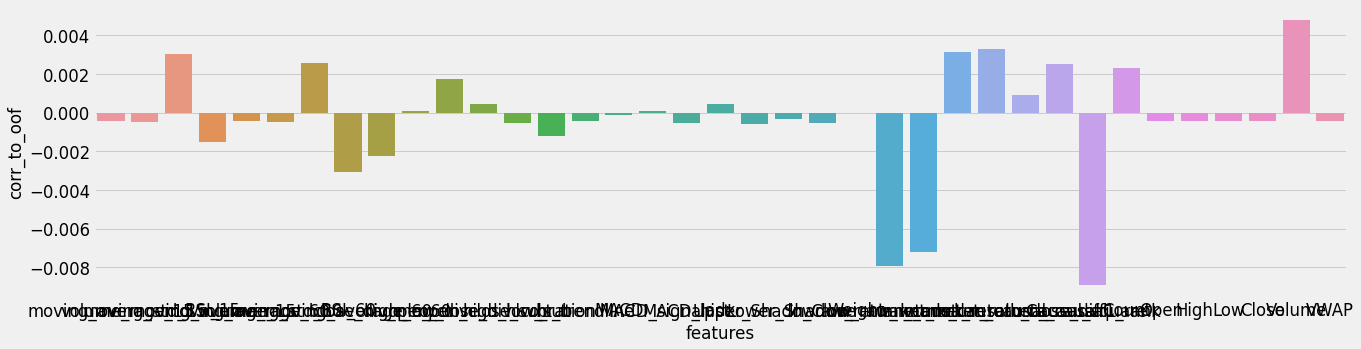

In [48]:
fes = feature_exposures(data.drop(['datetime', 'timestamp', 'Asset_ID'], axis=1))
fes_df = pd.DataFrame()
fes_df['features'] = np.array(data.drop(['datetime', 'timestamp', 'Asset_ID', 'Target'], axis=1).columns)

fes_df['corr_to_oof'] = fes
fig, ax = plt.subplots(1, 1, figsize=(20, 5))
sns.barplot(x='features', y='corr_to_oof', data=fes_df, ax=ax)